C:\Users\ASUS\AppData\Local\Temp\ipykernel_21344\3972235610.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Turbiedad_cruda"].interpolate(method='linear', inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21344\3972235610.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 25)             │           825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,225 (12.60 KB)

 Trainable params: 3,225 (12.60 KB)

 Non-trainable params: 0 (0.00 B)


Entrenando el modelo...
Entrenamiento completado.

Precisión (Accuracy) en el conjunto de prueba: 0.3863
Pérdida (Loss) en el conjunto de prueba: 1.8207
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step


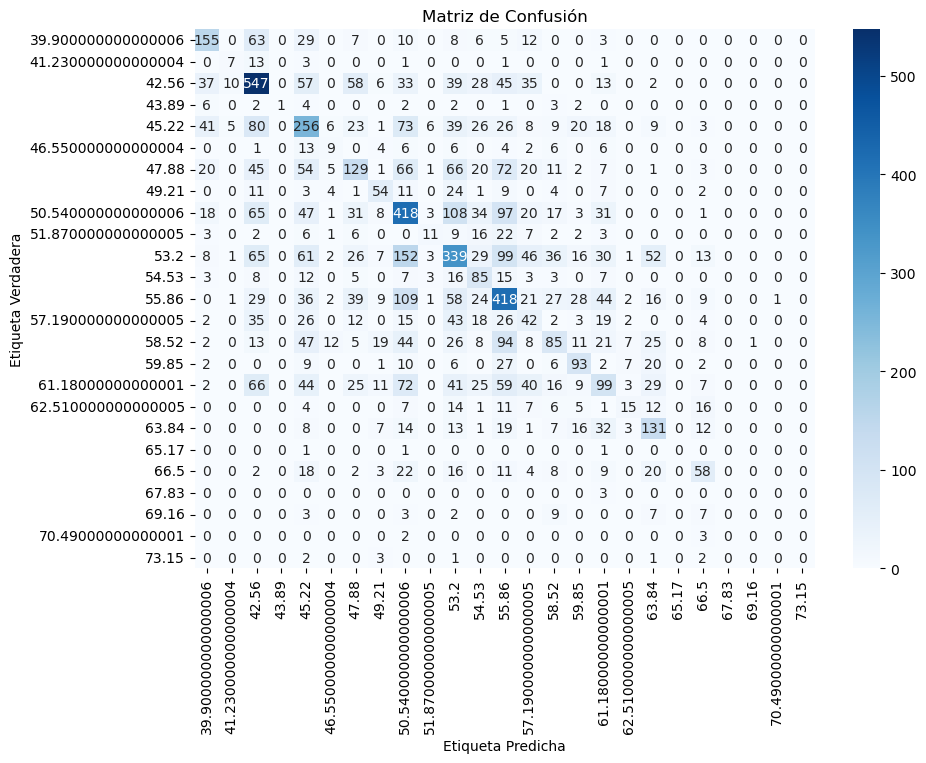


Reporte de Clasificación:
                    precision    recall  f1-score   support

39.900000000000006       0.52      0.52      0.52       298
41.230000000000004       0.29      0.27      0.28        26
             42.56       0.52      0.60      0.56       910
             43.89       1.00      0.04      0.08        23
             45.22       0.34      0.39      0.37       649
46.550000000000004       0.21      0.16      0.18        57
             47.88       0.35      0.25      0.29       523
             49.21       0.40      0.41      0.41       131
50.540000000000006       0.39      0.46      0.42       902
51.870000000000005       0.39      0.12      0.19        90
              53.2       0.39      0.34      0.36       986
             54.53       0.26      0.51      0.35       167
             55.86       0.39      0.48      0.43       874
57.190000000000005       0.15      0.17      0.16       249
             58.52       0.33      0.19      0.25       436
            

c:\Users\ASUS\anaconda3\envs\Bootcamp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\anaconda3\envs\Bootcamp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\anaconda3\envs\Bootcamp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
# Importación de librerías necesarias
import sqlite3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar y preparar los datos
# Conectar a la base de datos y cargar los datos
conn = sqlite3.connect('sensores.db')
df = pd.read_sql_query("SELECT * FROM datos_unificados", conn)
conn.close()
df["FechaHora"]=pd.to_datetime(df["FechaHora"])
# Definir las columnas a evaluar y la columna objetivo
# Puedes modificar esta lista para probar con diferentes características de entrada
columnas_a_evaluar = ['Turbiedad_cruda', 
                      'Color_agua_Natural', 
                      'pH_cruda',
                      "Alcalinidad_total_cruda"
                      ]
columna_objetivo = 'Sulfato'

df["Turbiedad_cruda"].interpolate(method='linear', inplace=True)
df["Color_agua_Natural"].interpolate(method='linear', inplace=True)
df["pH_cruda"].interpolate(method='linear', inplace=True)
df["Alcalinidad_total_cruda"].interpolate(method='linear', inplace=True)

df["Sulfato"].fillna(method="bfill", inplace=True)

# Crear una lista de todas las columnas necesarias
columnas_necesarias = columnas_a_evaluar + [columna_objetivo]

# Eliminar filas con valores nulos en las columnas seleccionadas
df_limpio = df[columnas_necesarias].dropna()

# Separar características (X) y objetivo (y)
X = df_limpio[columnas_a_evaluar]
y = df_limpio[columna_objetivo]

# 2. Preprocesamiento de datos
# Codificar la variable objetivo (Sulfato) a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Guardar las clases originales para usarlas en la matriz de confusión
clases_objetivo = label_encoder.classes_

# Escalar las características de entrada
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical)

# 3. Construir el modelo de Red Neuronal
# Definir la arquitectura de la red
numero_entradas = X_train.shape[1]
numero_salidas = y_categorical.shape[1]

modelo = Sequential()
modelo.add(Input(shape=(numero_entradas,)))

# --- Capas Ocultas ---
# Puedes añadir o quitar capas 'Dense' para cambiar la profundidad de la red
modelo.add(Dense(64, activation='relu'))
modelo.add(Dense(32, activation='relu'))
# --- Fin de Capas Ocultas ---

modelo.add(Dense(numero_salidas, activation='softmax')) # Capa de salida para clasificación

# Compilar el modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar un resumen del modelo
modelo.summary()

# 4. Entrenar y Evaluar el modelo
print("\nEntrenando el modelo...")
historial = modelo.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=0)
print("Entrenamiento completado.")

# Evaluar el modelo con los datos de prueba
loss, accuracy = modelo.evaluate(X_test, y_test, verbose=0)
print(f"\nPrecisión (Accuracy) en el conjunto de prueba: {accuracy:.4f}")
print(f"Pérdida (Loss) en el conjunto de prueba: {loss:.4f}")

# 5. Visualizar Resultados
# Realizar predicciones
y_pred_prob = modelo.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Matriz de Confusión
cm = confusion_matrix(y_test_labels, y_pred)
cm_df = pd.DataFrame(cm, index=clases_objetivo, columns=clases_objetivo)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test_labels, y_pred, target_names=clases_objetivo.astype(str)))


In [7]:
# regla de Sturges para determinar el número de bins en un histograma
def Sturges_rule(n):
    return int(np.ceil(1 + np.log2(n)))
# funcion de espacios para visualización
def espacios(n):
    print("\n"*n)

def mean_non_zero(series):
    return series[series > 0].mean()
# Función para convertir un mes en texto a un número
def mes_a_numero(mes):
    meses = {
        'Enero': 1,
        'Febrero': 2,
        'Marzo': 3,
        'Abril': 4,
        'Mayo': 5,
        'Junio': 6,
        'Julio': 7,
        'Agosto': 8,
        'Septiembre': 9,
        'Octubre': 10,
        'Noviembre': 11,
        'Diciembre': 12,
    }
    return meses[mes]


Calculando el error personalizado para la Red Neuronal...
Cálculo de error finalizado.

Matriz de Confusión de la Red Neuronal con Error Calculado:
       39.9  41.23  42.56  43.89  45.22  46.55  47.88  49.21  50.54  51.87  \
39.90   155      0     63      0     29      0      7      0     10      0   
41.23     0      7     13      0      3      0      0      0      1      0   
42.56    37     10    547      0     57      0     58      6     33      0   
43.89     6      0      2      1      4      0      0      0      2      0   
45.22    41      5     80      0    256      6     23      1     73      6   
46.55     0      0      1      0     13      9      0      4      6      0   
47.88    20      0     45      0     54      5    129      1     66      1   
49.21     0      0     11      0      3      4      1     54     11      0   
50.54    18      0     65      0     47      1     31      8    418      3   
51.87     3      0      2      0      6      1      6      0      0    

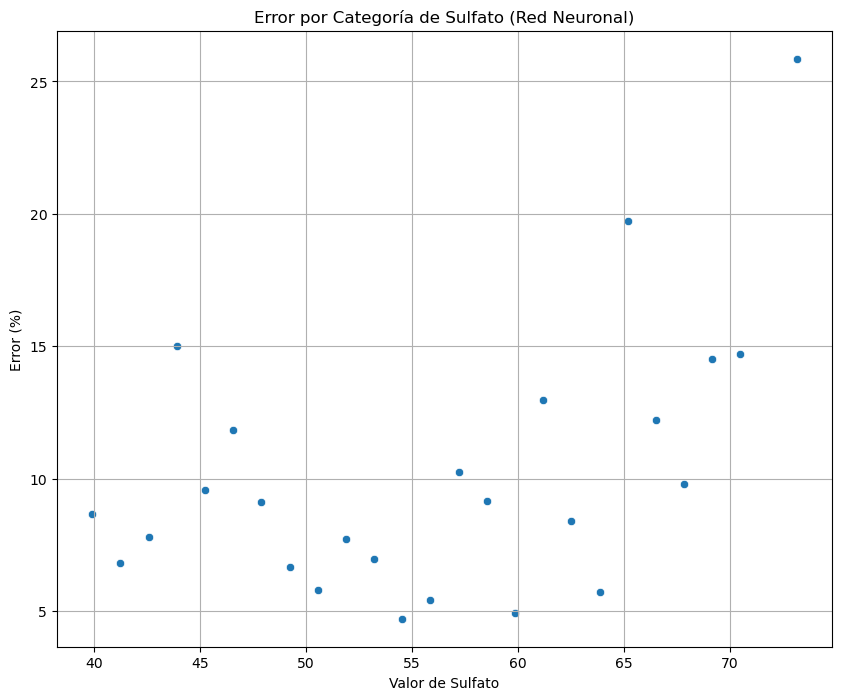

In [8]:

# 6. Análisis de Error Personalizado (replicando la lógica de k-vecinos)
print("\nCalculando el error personalizado para la Red Neuronal...")

# Asegurarse de que los nombres de las clases son numéricos para los cálculos
y_unicos_nn = clases_objetivo.astype(float)
matriz_confusion_nn = pd.DataFrame(cm, index=y_unicos_nn, columns=y_unicos_nn)

for indice_valor in y_unicos_nn:
    valor_acumulado = 0
    # Iterar sobre las columnas (predicciones)
    for columna_valor in y_unicos_nn:
        # Obtener el conteo de la matriz de confusión
        conteo = matriz_confusion_nn.loc[indice_valor, columna_valor]
        # Calcular la diferencia absoluta entre el valor real y el predicho
        diferencia = abs(indice_valor - columna_valor)
        # Acumular el producto
        valor_acumulado += conteo * diferencia
    
    # Guardar la suma de productos
    matriz_confusion_nn.loc[indice_valor, "SumaProducto"] = valor_acumulado
    
    # Calcular el total de muestras para la clase actual
    total_muestras_clase = matriz_confusion_nn.loc[indice_valor, y_unicos_nn].sum()
    
    # Calcular el error promedio para la clase
    error_promedio = valor_acumulado / total_muestras_clase if total_muestras_clase > 0 else 0
    
    # Calcular el error como porcentaje del valor real (evitando división por cero)
    error_porcentual = (error_promedio * 100 / indice_valor) if indice_valor > 0 else 0
    matriz_confusion_nn.loc[indice_valor, "Error"] = error_porcentual

print("Cálculo de error finalizado.\n")
print("Matriz de Confusión de la Red Neuronal con Error Calculado:")
print(matriz_confusion_nn)

# Visualizar el error
error_medio_total_nn = matriz_confusion_nn["Error"].mean()
print(f"\nError medio total para la Red Neuronal: {error_medio_total_nn:.2f}%")

plt.figure(figsize=(10, 8))
sns.scatterplot(x=matriz_confusion_nn.index, y=matriz_confusion_nn["Error"])
plt.title('Error por Categoría de Sulfato (Red Neuronal)')
plt.xlabel('Valor de Sulfato')
plt.ylabel('Error (%)')
plt.grid(True)
plt.show()
